## James Cooper   |   CSC 521  |   Final Project   

In [60]:
import os
import csv
import math
import random
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
from termcolor import colored
from itertools import combinations
from scipy import stats

In [61]:
os.chdir("C:\\Users\\James Cooper\\Desktop\\DePaul\\Monte Carlo Algorithms")

#### Dataset read into pandas dataframe

In [62]:
dat = pd.read_csv("accidents.csv", sep=',', header=0)

#### A logged losses column is added 
As shown in graphs below, we can see that the losses display a lognormal distribution

In [63]:
dat['Log_Loss'] = np.log(dat['Lost'])
dat.head()

,Plant,Day,Lost,Log_Loss
0,A,1,3348,8.116118
1,B,4,181,5.198497
2,B,7,250,5.521461
3,A,13,5446,8.602637
4,A,30,38549,10.559685


In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 4 columns):
Plant       291 non-null object
Day         291 non-null int64
Lost        291 non-null int64
Log_Loss    291 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 9.2+ KB


In [8]:
dat.describe()

,Day,Lost,Log_Loss
count,291.000000,291.000000,291.000000
mean,697.202749,9189.185567,7.973683
std,427.485991,21853.188417,1.552151
min,1.000000,46.000000,3.828641
25%,327.000000,987.000000,6.894670
50%,706.000000,2886.000000,7.967627
75%,1041.500000,8717.000000,9.072894
max,1462.000000,272851.000000,12.516681


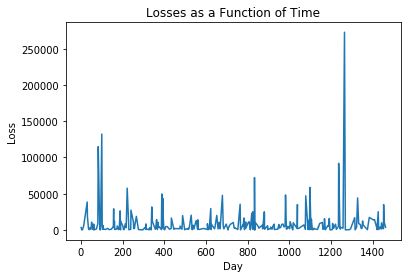

In [64]:
plt.plot(dat['Day'], dat['Lost'])
plt.title('Losses as a Function of Time')
plt.xlabel('Day')
plt.ylabel('Loss')
plt.show()

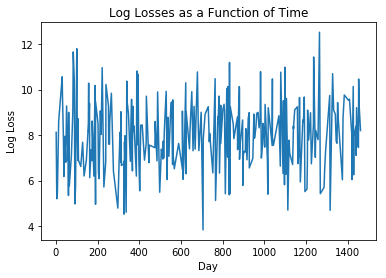

In [24]:
plt.plot(dat['Day'], dat['Log_Loss'])
plt.title('Log Losses as a Function of Time')
plt.xlabel('Day')
plt.ylabel('Log Loss')
plt.show()

In [31]:
np = np.array(dat['Log_Loss'])

In [35]:
k, p = stats.normaltest(np)
alpha = 0.05
print(p)

0.4471169527346006


In [37]:
if p < alpha:
    print("the null hypothesis can be rejected")
else:
    print("the null hypothesis cannot be rejected")

the null hypothesis cannot be rejected


#### Losses over 4 years broken down by Plant A and B

(0, 0.0001)

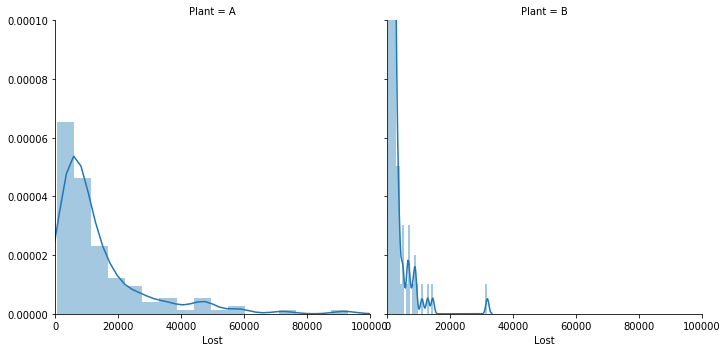

In [7]:
g = sns.FacetGrid(dat, col="Plant", size=5, aspect=1) 
g.map(sns.distplot, "Lost")

plt.xlim(0, 100000) 
plt.ylim(0, 0.00010)

#### Log value of total losses over 4 years

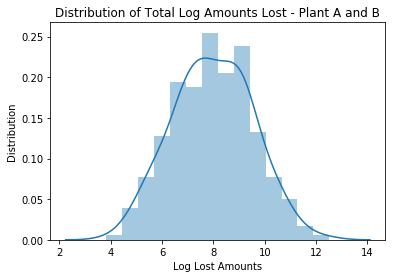

In [43]:
fig2 = sns.distplot(dat['Log_Loss'])
plt.xlabel("Log Lost Amounts")
plt.ylabel("Distribution")
plt.title("Distribution of Total Log Amounts Lost - Plant A and B")
plt.show()

#### CDF log distribution

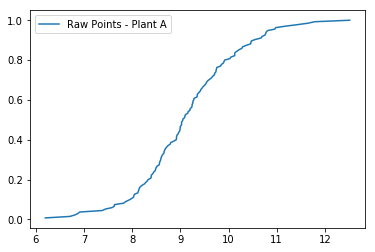

In [65]:
pointsA = F(np.array(LogA))
plt.plot(pointsA[:,0], pointsA[:,1], label = 'Raw Points - Plant A')
plt.legend()
plt.show()

#### Data broken down into 4 years in days

In [66]:
Year_1 = dat[dat.Day <= 365]    
Year_2 = dat[(dat['Day'] > 365) & (dat['Day'] <= 730)]
Year_3 = dat[(dat['Day'] > 730) & (dat['Day'] <= 1095)]
Year_4 = dat[(dat['Day'] > 1095)]

In [67]:
A_y1 = Year_1['Lost'][Year_1['Plant'] == 'A']
A_y2 = Year_2['Lost'][Year_2['Plant'] == 'A']
A_y3 = Year_3['Lost'][Year_3['Plant'] == 'A']
A_y4 = Year_4['Lost'][Year_4['Plant'] == 'A']
B_y1 = Year_1['Lost'][Year_1['Plant'] == 'B']
B_y2 = Year_2['Lost'][Year_2['Plant'] == 'B']
B_y3 = Year_3['Lost'][Year_3['Plant'] == 'B']
B_y4 = Year_4['Lost'][Year_4['Plant'] == 'B']

### Question 1: Average Number of accidents per year - broken down by Plant A and Plant B

In [68]:
a = colored('Average number of accidents per year in Plant A: %.2f' % ((A_y1.count() + A_y2.count() + A_y3.count() + 
                                                                      A_y4.count())/4),"blue", attrs = ['bold'])
print(a)
b = colored('Average number of accidents per year in Plant B: %.2f' % ((B_y1.count() + B_y2.count() + B_y3.count() + 
                                                                      B_y4.count())/4), 'red', attrs = ['bold'])
print(b)

Average number of accidents per year in Plant A: 33.75
Average number of accidents per year in Plant B: 39.00


### Question 2: Average Loss per accident - broken down by Plant A and B

In [69]:
data_A = dat['Lost'][dat['Plant'] == 'A']
c = colored('The Average loss per accident in Plant A: %.3f' % (sum(data_A)/len(data_A)), "blue", attrs = ['bold'])
print(c)
data_B = dat['Lost'][dat['Plant'] == 'B']
d = colored('The Average loss per accident in Plant B: %.3f' % (sum(data_B)/len(data_B)), "red", attrs = ['bold'])
print(d)

The Average loss per accident in Plant A: 17470.156
The Average loss per accident in Plant B: 2022.962


### Question 3: Average Loss in total per year - broken down by Plant A and Plant B

In [70]:
av_lossA = sum(data_A)/4
av_loss_printA = colored('The average loss in total per year for Plant A: %.3f' % (av_lossA), "blue", attrs = ['bold'])
print(av_loss_printA)

av_lossB = sum(data_B)/4
av_loss_printB = colored('The average loss in total per year for Plant B: %.3f' % (av_lossB), "red", attrs = ['bold'])
print(av_loss_printB)

The average loss in total per year for Plant A: 589617.750
The average loss in total per year for Plant B: 78895.500


#### Distribution and Average for each year Plant A

Mean Lost for year 1 - Plant A:  18206.405405405407


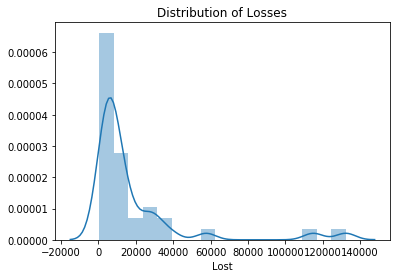

None
Mean Lost for year 2 - Plant A:  13648.466666666667


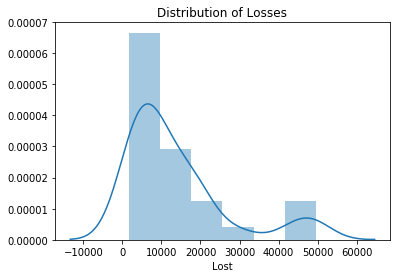

None
Mean Lost for year 3 - Plant A:  14588.194444444445


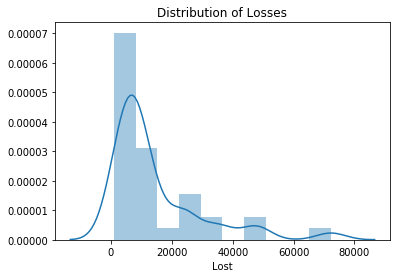

None
Mean Lost for year 4 - Plant A:  23443.90625


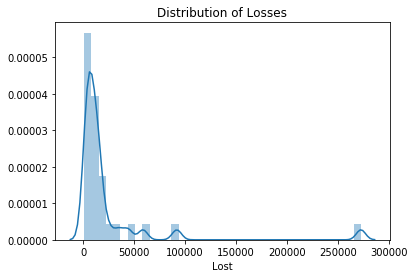

None


In [71]:
def mu(X, plant, year):
    for i in X:
        #u = np.array(X)
        means = np.mean(X)
    answer = colored(('Mean Lost for year %d - Plant %s: ' % (year, plant)), "blue", attrs = ['bold'])
    print(answer, means) 

    fig_1 = sns.distplot(X)
    #X.hist(figsize=[8,6])
    plt.title('Distribution of Losses')
    plt.show()
    

#analysis = colored(('We can see here a mean across all four years are fairly similar, the distributions also show that the losses display an exponential distrubution, taking the log of the losses produces a much more normal distribution'),'blue')
#print(analysis'\n')    


print(mu(A_y1, 'A', 1))
print(mu(A_y2, 'A', 2))
print(mu(A_y3, 'A', 3))
print(mu(A_y4, 'A', 4))

#### Distribution and Average for each year Plant B

Mean Lost in year 1 - Plant B:  1908.2553191489362


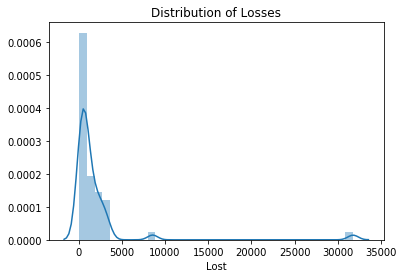

None
Mean Lost in year 2 - Plant B:  1778.264705882353


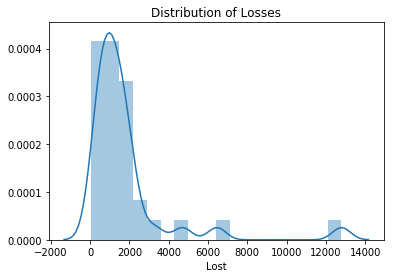

None
Mean Lost in year 3 - Plant B:  2238.175


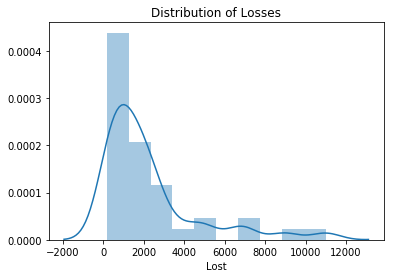

None
Mean Lost in year 4 - Plant B:  2168.7428571428572


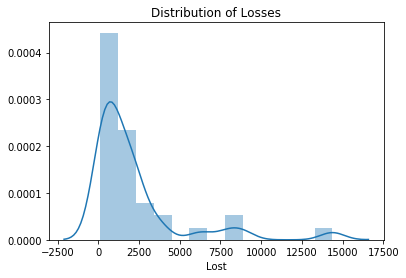

None


In [26]:
def mu(X, plant, year):
    for i in X:
        #u = np.array(X)
        means = np.mean(X)
    answer = colored(('Mean Lost in year %d - Plant %s: ' % (year, plant)), "blue", attrs = ['bold'])
    print(answer, means) 

    fig_1 = sns.distplot(X)
    #X.hist(figsize=[8,6])
    plt.title('Distribution of Losses')
    plt.show()
    

#analysis = colored(('We can see here a mean across all four years are fairly similar, the distributions also show that the losses display an exponential distrubution, taking the log of the losses produces a much more normal distribution'),'blue')
#print(analysis'\n')    

print(mu(B_y1, 'B', 1))
print(mu(B_y2, 'B', 2))
print(mu(B_y3, 'B', 3))
print(mu(B_y4, 'B', 4))

### Plotting Distributions

In [72]:
#Function takes in a vector, sorts from smallest to largest, makes another column which is the proportion
#that each value is of the total - or the percentile

def F(v):
    v.sort()
    n = len(v)
    data = []
    for k in range(n):
        point = (v[k], float(k+1)/n)
        data.append(point)
    return np.array(data)

#### Parameters to use in simulations

In [73]:
mu_A = (sum(data_A)/len(data_A))
mu_B = (sum(data_B)/len(data_B))
A_min = min(data_A)
B_min = min(data_B)
alphaA = mu_A/(mu_A - A_min)
alphaB = mu_B/(mu_B - B_min)
sigmaA = np.std(data_A)
sigmaB = np.std(data_B)

i = colored(' mu of A = %f \n mu of B = %f \n sigma A = %f \n sigmaB = %f \n min of A = %f \n min of B = %f \n alpha A = %f \n alpha B = %f ' % 
       (mu_A, mu_B, A_min, B_min, alphaA, alphaB, sigmaA, sigmaB), 'blue', attrs = ['bold'])
'\t'
print(i)

 mu of A = 17470.155556 
 mu of B = 2022.961538 
 sigma A = 490.000000 
 sigmaB = 46.000000 
 min of A = 1.028857 
 min of B = 1.023268 
 alpha A = 29751.865078 
 alpha B = 3325.907709 


In [13]:
LogA = dat['Log_Loss'][dat['Plant'] == 'A']
LogB = dat['Log_Loss'][dat['Plant'] == 'B']

In [74]:
log_mu_A = (sum(LogA)/len(LogA))
log_mu_B = (sum(LogB)/len(LogB))
logA_min = min(LogA)
logB_min = min(LogB)
log_alphaA = log_mu_A/(log_mu_A - logA_min)
log_alphaB = log_mu_B/(log_mu_B - logB_min)
log_sigmaA = np.std(LogA)
log_sigmaB = np.std(LogB)

print('\n')
i = colored(' mu of A = %f \n mu of B = %f \n log sigma A = %f \n log sigma B = %f \n min of A = %f \n min of B = %f \n alpha A = %f \n alpha B = %f' % 
       (log_mu_A, log_mu_B, logA_min, logB_min, log_alphaA, log_alphaB, log_sigmaA, log_sigmaB), 'blue', attrs = ['bold'])
'\t'
print(i)



 mu of A = 9.146100 
 mu of B = 6.959092 
 log sigma A = 6.194405 
 log sigma B = 3.828641 
 min of A = 3.098593 
 min of B = 2.223032 
 alpha A = 1.061511 
 alpha B = 1.133381


#### Plotting the Pareto distribution with the unlogged data

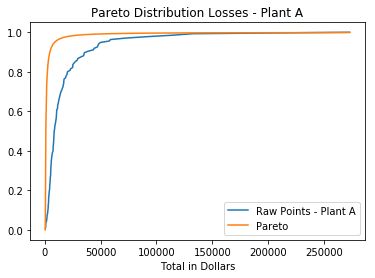

In [16]:
def pareto_distA(xvalues, xMb = A_min, alphaa = alphaA):
    return 1.0 - (xMb/xvalues)**alphaa

pointsA = F(np.array(data_A))
paretoA = [(xvalues, pareto_distA(xvalues)) for (xvalues,y) in pointsA]
pareto_pointsA = np.array(paretoA)


plt.plot(pointsA[:,0], pointsA[:,1], label = 'Raw Points - Plant A')
plt.plot(pareto_pointsA[:,0], pareto_pointsA[:,1], label = 'Pareto')
#plt.plot(pareto_points)
plt.title('Pareto Distribution Losses - Plant A')
plt.xlabel('Total in Dollars')
plt.legend()
plt.show()

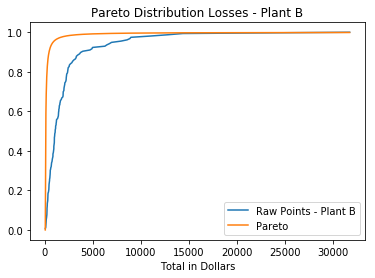

In [17]:
def pareto_distB(xvalues, xMb = B_min, alphab = alphaB):
    return 1.0 - (xMb/xvalues)**alphab

pointsB = F(np.array(data_B))
paretoB = [(xvalues, pareto_distB(xvalues)) for (xvalues,y) in pointsB]
pareto_pointsB = np.array(paretoB)


plt.plot(pointsB[:,0], pointsB[:,1], label = 'Raw Points - Plant B')
plt.plot(pareto_pointsB[:,0], pareto_pointsB[:,1], label = 'Pareto')
#plt.plot(pareto_points)
plt.title('Pareto Distribution Losses - Plant B')
plt.xlabel('Total in Dollars')
plt.legend()
plt.show()

#### Exponential Distribution for the time between events

The lambda value is the length of the data for each plant divided by 1462 - which is 4 years in days and the number of days in the data, this provides for a good match to what the actual distribution looks like when simulating the exponential distribution seen in the plot below

In [75]:
TimeA = dat['Day'][dat['Plant'] == 'A']
lambA = float(len(TimeA))/1462

TimeB = dat['Day'][dat['Plant'] == 'B']
lambB = float(len(TimeB))/1462

Differenced data - in order to get the time intervals between events, we need to take the difference of our data

In [76]:
diffA = np.diff(TimeA)
diff_tA = np.concatenate([[1], diffA])
diff_timeA = diff_tA.astype(float)
print(diff_timeA)

[ 1. 12. 17.  1. 20. 10. 20.  2.  5. 12.  2.  4. 50.  1.  0.  4. 12.  1.
  8.  6.  0.  2. 10.  2. 15.  5. 18. 12.  6.  8. 43.  3.  0. 30.  6. 12.
  3.  7.  2.  3. 13.  5.  2.  0. 12.  7. 20. 41.  1. 12. 18. 14.  9.  7.
 16.  4.  5. 28. 18. 16.  2. 27. 11. 16. 18. 10.  9. 15. 33. 19. 24.  2.
 11.  5.  4.  1.  3.  4. 14. 20.  9.  1.  0.  3. 12. 21.  6.  5. 22.  3.
  6.  5.  6.  5.  5.  2. 10.  5.  7. 15. 20. 40. 13.  7.  7. 30.  4.  0.
  6. 13. 10. 16.  3.  2.  2. 16. 28.  1.  6.  4. 18. 49. 14. 13. 11.  2.
 30. 20. 16.  7.  3. 10.  3. 10.  2.]


In [77]:
diffB = np.diff(TimeB)
diff_tB = np.concatenate([[1], diffB])
diff_timeB = diff_tB.astype(float)
print(diff_timeB)

[ 1.  3. 29.  2.  1.  4.  4.  2.  9.  1.  1.  4. 10. 17.  3. 11.  3. 11.
  9.  7. 11. 16.  7. 15.  6.  0. 14.  3.  6. 17.  9. 14.  4. 19. 21. 10.
  7. 11.  0.  2.  0.  2.  1.  1.  6.  3. 17. 10.  0. 19.  2. 10.  4. 23.
  8. 13.  2. 37. 13.  9.  6.  2.  2. 17.  4.  4. 14.  4.  1.  7. 39.  3.
  6.  9. 16.  2. 15. 10. 15.  3. 20. 30.  2. 15. 13. 11.  1.  6.  1.  6.
  0. 10. 12. 11.  8.  3.  1. 18. 18.  1.  8.  1. 15.  1.  5.  6.  2. 17.
 17. 41.  7.  7.  2. 13.  2. 21.  1.  5. 26.  7. 13.  7.  7.  6.  3.  6.
  3. 39.  6.  6. 22. 10.  2.  6.  9.  4. 19. 13. 11. 18.  3.  4. 22.  7.
 10. 12.  4. 26.  3. 31. 12.  8. 12.  8.  3. 10.]


In [78]:
def F_exponential(x, lamb):
    return 1.0 - exp(-lamb*x)

#### Exponential plot for Plant A

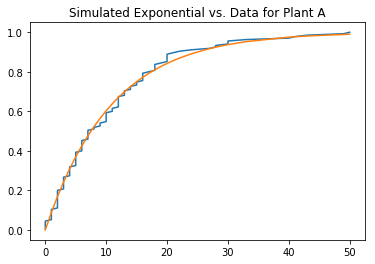

In [80]:
points_tA = F(np.array(diff_timeA))
points_exp = [(x, F_exponential(x, lambA)) for (x,y) in points_tA]
points_expA = np.array(points_exp)
plt.title('Simulated Exponential vs. Data for Plant A')
plt.plot(points_tA[:,0], points_tA[:,1])
plt.plot(points_expA[:,0], points_expA[:,1])

#### Exponential plot for Plant B

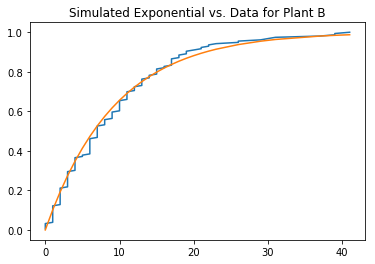

In [81]:
points_tB = F(np.array(diff_timeB))
points_exp = [(x, F_exponential(x, lambB)) for (x,y) in points_tB]
points_expB = np.array(points_exp)
plt.title('Simulated Exponential vs. Data for Plant B')
plt.plot(points_tB[:,0], points_tB[:,1])
plt.plot(points_expB[:,0], points_expB[:,1])

### Question 4 - Simulation using simulate_once function and then simulate_many

## Plant A Simulation

In [217]:
class Simulator(object):
    
    def __init__(self):
        pass
    
    def simulate_once(self):
        t = 0
        total_loss = 0
        while t < 365:
            t = t + random.expovariate(lambA)
            amount = random.gauss(mu_A, sigmaA)
            #amount = random.paretovariate(log_alphaA)*logA_min
            total_loss = total_loss + amount
        return total_loss
    
    def simulate_many(self, ap=0.1, rp=0.1, ns=10000):
        sy = 0.0
        sy2 = 0.0
        self.history = []
        for k in range(1, ns+1):
            y = self.simulate_once()
            sy = sy + y
            sy2 = sy2 + y*y #sum of y^2 to y^2
            y_bar = sy/k #average
            y2_bar = sy2/k 
            sigma = (y2_bar - y_bar**2)**0.5 
            dy_bar = sigma/k**0.5 #error on the average
            #self.history.append((k, y_bar, dy_bar))
            self.history.append((y_bar))
            if dy_bar<ap and k>100:
                return y_bar
        return y_bar


sim = Simulator()
print('mu=',mu_A, 'lambda value=',lambA, 'alpha=',alphaA)
c = colored('The average yearly loss for Plant A with 10% precision = ')
print(c)
print('loss =',sim.simulate_many(ap=0.1, ns=100000))
historya = sim.history[:100000]

mu= 17470.155555555557 lambda value= 0.09233926128590972 alpha= 1.0288572150235504
The average yearly loss for Plant A with 10% precision = 
loss = 605406.9731260132


### Bootstrap Error in Results for Plant A

In [219]:
y_bars = np.array(historya)
y_bar = y_bars.tolist()

def resample(v):
    #return [random.choice(v)]
    #v = y_bar
    n = len(v)
    u = [random.choice(v) for k in range(n)]
    return u

def bootstrap(scenarios, confidence=90):
    samples = []
    for x in range(1000):
        samples.append(np.mean(resample(scenarios)))
        samples.sort()
    i = int((1000-confidence)/2)
    j = 99-i
    mu_plus = samples[j]
    mu_minus = samples[i]
    return mu_minus, mu_plus

for confidence in (50, 68, 80, 90):
    mu = np.mean(y_bar)
    mu_minus, mu_plus = bootstrap(y_bar)
    print (confidence, mu_minus, mu, mu_plus)  

50 605126.5891187396 605127.2336195105 605129.0952236425
68 605126.6931001974 605127.2336195105 605129.4540232203
80 605126.2775814689 605127.2336195105 605128.904740706
90 605126.6497171395 605127.2336195105 605129.290323567


In [132]:
h_A = np.array(historya)

### Plot of Error bars for Plant A

We can see here that the errorbars get smaller as the losses converge

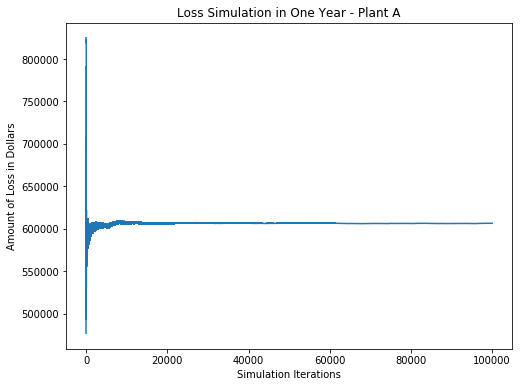

In [200]:
#from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
plt.errorbar(h_A[:,0], h_A[:,1], h_A[:,2])
#plt.xlim(0, 500) 
#plt.ylim(65000, 95000)
plt.xlabel("Simulation Iterations")
plt.ylabel("Amount of Loss in Dollars")
plt.title("Loss Simulation in One Year - Plant A")
plt.show()

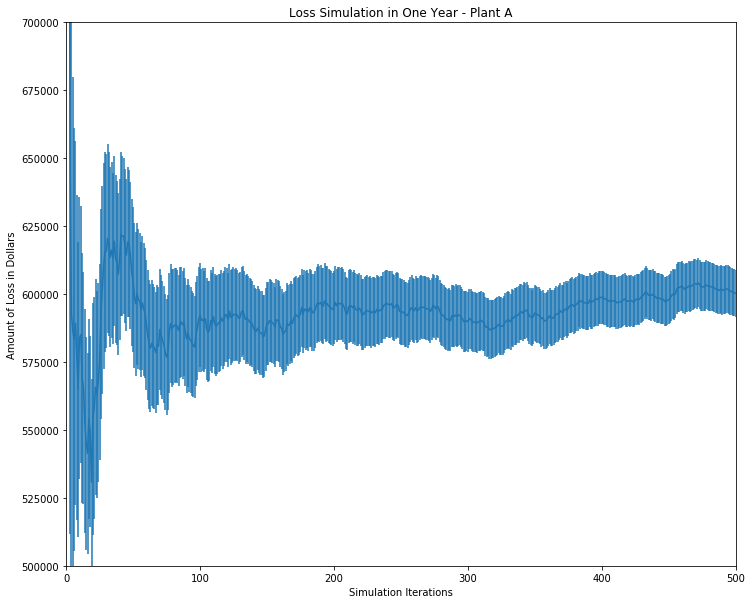

In [201]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,10
plt.errorbar(h_A[:,0], h_A[:,1], h_A[:,2])
plt.xlim(0, 500) 
plt.ylim(500000, 700000)
plt.xlabel("Simulation Iterations")
plt.ylabel("Amount of Loss in Dollars")
plt.title("Loss Simulation in One Year - Plant A")
plt.show()

In [18]:
class Simulator(object):
    
    def __init__(self):
        pass
    
    def simulate_once(self):
        t = 0
        total_loss = 0
        while t < 365:
            t = t + random.expovariate(lambA)
            amount = random.gauss(mu_A, sigmaA)
            #amount = random.paretovariate(log_alphaA)*logA_min
            total_loss = total_loss + amount
        return total_loss
    
    def simulate_many(self, ap=0.1, rp=0.1, ns=10000):
        sy = 0.0
        sy2 = 0.0
        self.history = []
        for k in range(1, ns+1):
            y = self.simulate_once()
            sy = sy + y
            sy2 = sy2 + y*y #sum of y^2 to y^2
            y_bar = sy/k #average
            y2_bar = sy2/k 
            sigma = (y2_bar - y_bar**2)**0.5 
            dy_bar = sigma/k**0.5 #error on the average
            self.history.append((k, y_bar, dy_bar))
            #self.history.append((y_bar))
            if dy_bar<ap and k>100:
                return y_bar
        return y_bar


sim = Simulator()
print('mu=',mu_A, 'lambda value=',lambA, 'alpha=',alphaA)
c = colored('The average yearly loss for Plant A with 10% precision = ')
print(c)
print('loss =',sim.simulate_many(ap=0.1, ns=100000))
historya = sim.history[:100000]

mu= 17470.155555555557 lambda value= 0.09233926128590972 alpha= 1.0288572150235504
The average yearly loss for Plant A with 10% precision = 
loss = 606163.3261370979


(array([  1.,   5.,  22.,  48., 102., 128.,  82.,  82.,  23.,   7.]),
 array([599192.13178073, 600451.65959373, 601711.18740673, 602970.71521973,
        604230.24303273, 605489.77084573, 606749.29865873, 608008.82647172,
        609268.35428472, 610527.88209772, 611787.40991072]),
 <a list of 10 Patch objects>)

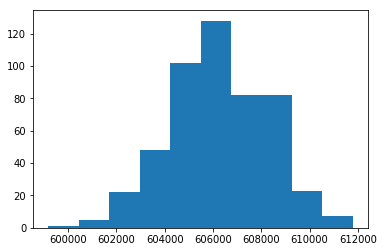

In [24]:
from matplotlib import rcParams
scenarios = []
for k in range(500):
    y = sim.simulate_many()
    scenarios.append(y)
    scenarios.sort
#print(scenarios)

rcParams['figure.figsize'] = 6,4
plt.hist(scenarios)  

### How much the company should budget to ensure it can cover losses in 90% of simulated scenarios in Plant A

In [33]:
scenarios.sort()
print('10% VaR=', scenarios[450])

10% VaR= 608901.872850586


## Plant B Simulation 

In [202]:
class Simulator(object):
    
    def __init__(self):
        pass
    
    def simulate_once(self):
        t = 0.0
        total_loss = 0.0
        while t < 365:
            t = t + random.expovariate(lambB)
            amount = random.gauss(mu_B, sigmaB)
            #amount = random.paretovariate(log_alphaA)*logA_min
            total_loss = total_loss + amount
        return total_loss
    
    def simulate_manyb(self, ap=0.1, rp=0.1, ns=10000):
        sy = 0.0
        sy2 = 0.0
        self.history = []
        for k in range(1, ns+1):
            y = self.simulate_once()
            sy = sy + y
            sy2 = sy2 + y*y #sum of y^2 to y^2
            y_bar = sy/k #average
            y2_bar = sy2/k 
            sigma = (y2_bar - y_bar**2)**0.5 
            dy_bar = sigma/k**0.5 #error on the average
            self.history.append((k, y_bar, dy_bar))
            #self.history.append((y_bar))
            if dy_bar<ap and k>100:
                return y_bar
        return y_bar



sim = Simulator()
print('mu=',mu_B, 'lambda value=',lambB, 'alpha=',alphaB) 
c = colored('The average yearly loss for Plant B with 10% precision = ')
print(c)
print(sim.simulate_manyb(ap=0.1, ns=100000))
historyb = sim.history[:100000]

mu= 2022.9615384615386 lambda value= 0.106703146374829 alpha= 1.0232680298048675
The average yearly loss for Plant B with 10% precision = 
80740.95289179828


### Bootstrap Error in Results for Plant B

In [91]:
y_barsb = np.array(historyb)
y_bar = y_barsb.tolist()

def resample(v):
    #return [random.choice(v)]
    #v = y_bar
    n = len(v)
    u = [random.choice(v) for k in range(n)]
    return u

def bootstrap(scenarios, confidence=90):
    samples = []
    for x in range(100):
        samples.append(np.mean(resample(scenarios)))
        samples.sort()
    i = int((100-confidence)/2)
    j = 99-i
    mu_plus = samples[j]
    mu_minus = samples[i]
    return mu_minus, mu_plus

for confidence in (50, 68, 80, 90):
    mu = np.mean(y_bar)
    mu_minus, mu_plus = bootstrap(y_bar)
    print (confidence, mu_minus, mu, mu_plus)  

50 80931.60123242464 80932.58619637636 80933.792963159
68 80931.44707596392 80932.58619637636 80933.69555461928
80 80931.67628188511 80932.58619637636 80933.57489558832
90 80931.61026559037 80932.58619637636 80933.65674364725


In [133]:
h = np.array(historyb)

### Plot of Error bars for Plant B

We can see that the errorbars get smaller as the number of iterations rises and the total loss converges

(76000, 84000)

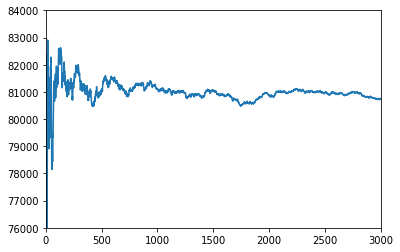

In [104]:
plt.plot(h[:,0], h[:,1])
plt.xlim(0, 3000) 
plt.ylim(76000, 84000)

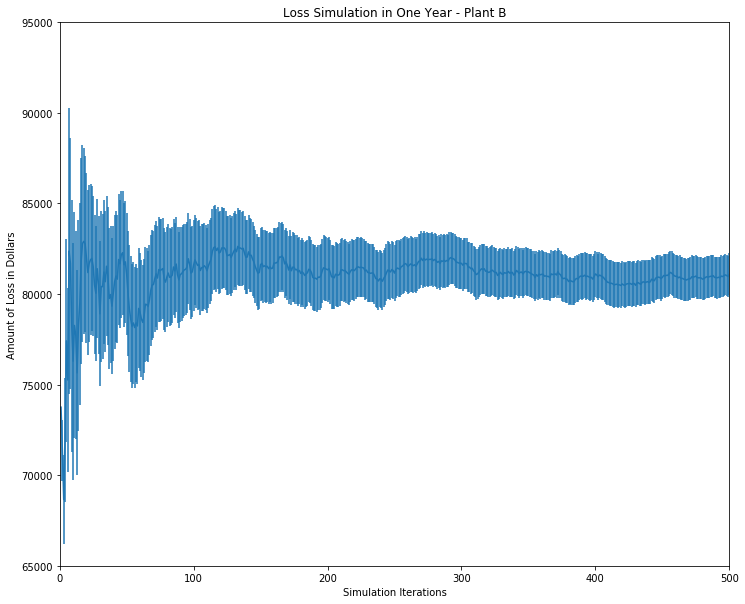

In [210]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,10
plt.errorbar(h[:,0], h[:,1], h[:,2])
plt.xlim(0, 500) 
plt.ylim(65000, 95000)
plt.xlabel("Simulation Iterations")
plt.ylabel("Amount of Loss in Dollars")
plt.title("Loss Simulation in One Year - Plant B")
plt.show()

(array([  2.,   6.,  22.,  61., 102., 124.,  95.,  54.,  26.,   8.]),
 array([79982.24621653, 80131.45237551, 80280.65853448, 80429.86469345,
        80579.07085243, 80728.2770114 , 80877.48317037, 81026.68932934,
        81175.89548832, 81325.10164729, 81474.30780626]),
 <a list of 10 Patch objects>)

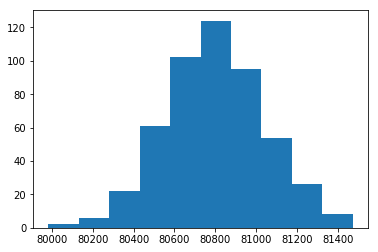

In [39]:
#Here we are using simulate many, but only with return y_bar, not with dy_bar or k
scenariosb = []
for k in range(500):
    yb = sim.simulate_manyb()
    scenariosb.append(yb)
#print(scenarios)

rcParams['figure.figsize'] = 6,4
plt.hist(scenariosb)  

### How much the company should budget to ensure it can cover losses in 90% of simulated scenarios in Plant B

In [43]:
scenariosb.sort()
print('10% VaR=', scenariosb[450])

10% VaR= 81116.05651844747
